In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The dataset contains admitted patients data with following columns:

    age : Age in years
    sex : Gender

    1: Male, 0: Female

    cp : Chest pain type

    0: Typical angina, 1: Atypical angina, 2: Non-angina pain, 3: Asymptomatic

    trestbps : Resting blood pressure (mmHg) on admission to hospital
    chol : Serum cholesterol (mg/dl)
    fbs : Fasting blood sugar > 120 mg/dl

    1: True, 0: False

    restecg : Resting electrocardiographic results

    0: Normal, 1: Having ST-T wave abnormality, 2: Probable or definite left ventricular hypertrophy

    thalach : Maximum heart rate achieved
    exang : Exercise induced angina

    1: True, 0: False

    oldpeak : ST depression induced by exercise relative to rest
    slope : Slope of the peak exercise ST segment

    1: Upsloping, 2: Flat, 3: Downsloping

    ca : Number of major vessels 0-3 colored by fluoroscopy
    thal : Thalassemia

    1: Normal, 2: Fixed defect, 3: Reversible defect

    target : Chances of heart attack

    0: Less, 1: More



In [2]:
heart_df = pd.read_csv('Heart_Disease_Dataset.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
heart_df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [5]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heart_df.duplicated().sum()

723

In [7]:
heart_df.drop_duplicates(inplace=True)
heart_df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00
mean,54.42,0.68,0.96,131.60,246.50,0.15,0.53,149.57,0.33,1.04,1.40,0.72,2.31,0.54
std,9.05,0.47,1.03,17.56,51.75,0.36,0.53,22.90,0.47,1.16,0.62,1.01,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,133.25,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.50,1.00,1.00,130.00,240.50,0.00,1.00,152.50,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.75,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [8]:
heart_df.thal.value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

In [9]:
heart_df.drop(heart_df.index[heart_df.thal==0], inplace=True)

In [10]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [11]:
heart_df.drop(['trestbps','restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',], 
              axis = 1,inplace = True)

In [12]:
heart_df.round(2)

,age,sex,cp,chol,fbs,thal,target
0,52,1,0,212,0,3,0
1,53,1,0,203,1,3,0
2,70,1,0,174,0,3,0
3,61,1,0,203,0,3,0
4,62,0,0,294,1,2,0
...,...,...,...,...,...,...,...
723,68,0,2,211,0,2,1
733,44,0,2,141,0,2,1
739,52,1,0,255,0,3,0
843,59,1,3,273,0,2,0


<ipython-input-13-69a7e4524e84>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


<AxesSubplot:title={'center':'Age distrubution along the dataset'}>

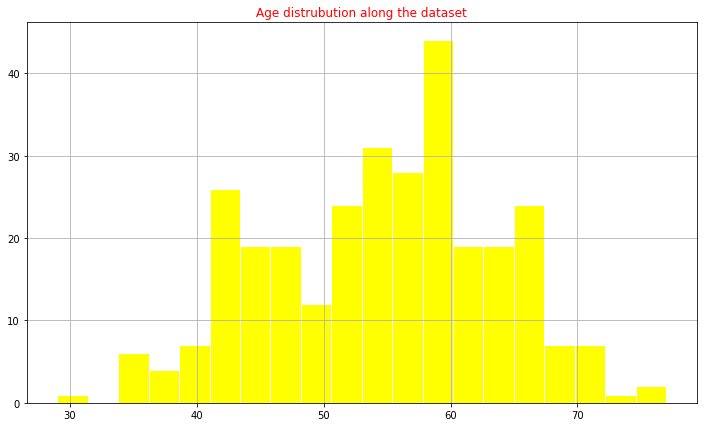

In [13]:
plt.figure(figsize=(12,7))
plt.title('Age distrubution along the dataset', color = 'r')
axes = plt.axes()
# axes.set_facecolor('black')
heart_df.age.hist(color='yellow', edgecolor = 'w', bins= 20)

In [14]:
def age_grp(row):
    if row.age>=70:
        return '70s'
    elif row.age >= 60:
        return '60s'
    elif row.age >= 50:
        return '50s'
    elif row.age >= 40:
        return '40s'
    elif row.age>= 30:
        return '30s'
    elif row.age>= 20:
        return '20s'
        
heart_df['age_grp'] = heart_df.apply(age_grp, axis=1)

In [15]:
heart_df

,age,sex,cp,chol,fbs,thal,target,age_grp
0,52,1,0,212,0,3,0,50s
1,53,1,0,203,1,3,0,50s
2,70,1,0,174,0,3,0,70s
3,61,1,0,203,0,3,0,60s
4,62,0,0,294,1,2,0,60s
...,...,...,...,...,...,...,...,...
723,68,0,2,211,0,2,1,60s
733,44,0,2,141,0,2,1,40s
739,52,1,0,255,0,3,0,50s
843,59,1,3,273,0,2,0,50s


In [16]:
age_df1 = heart_df.groupby(['age_grp']).target.count().to_frame(name=None)
#                                                to_frame(name=None)
# age_df.drop(['age','sex','cp','chol', 'fbs', 'thal'],axis=1, inplace=True)
age_df1.reset_index(inplace=True)
age_df1.rename(columns = {'target': 'total_patients'}, inplace=True)
age_df1

,age_grp,total_patients
0,20s,1
1,30s,14
2,40s,72
3,50s,123
4,60s,80
5,70s,10


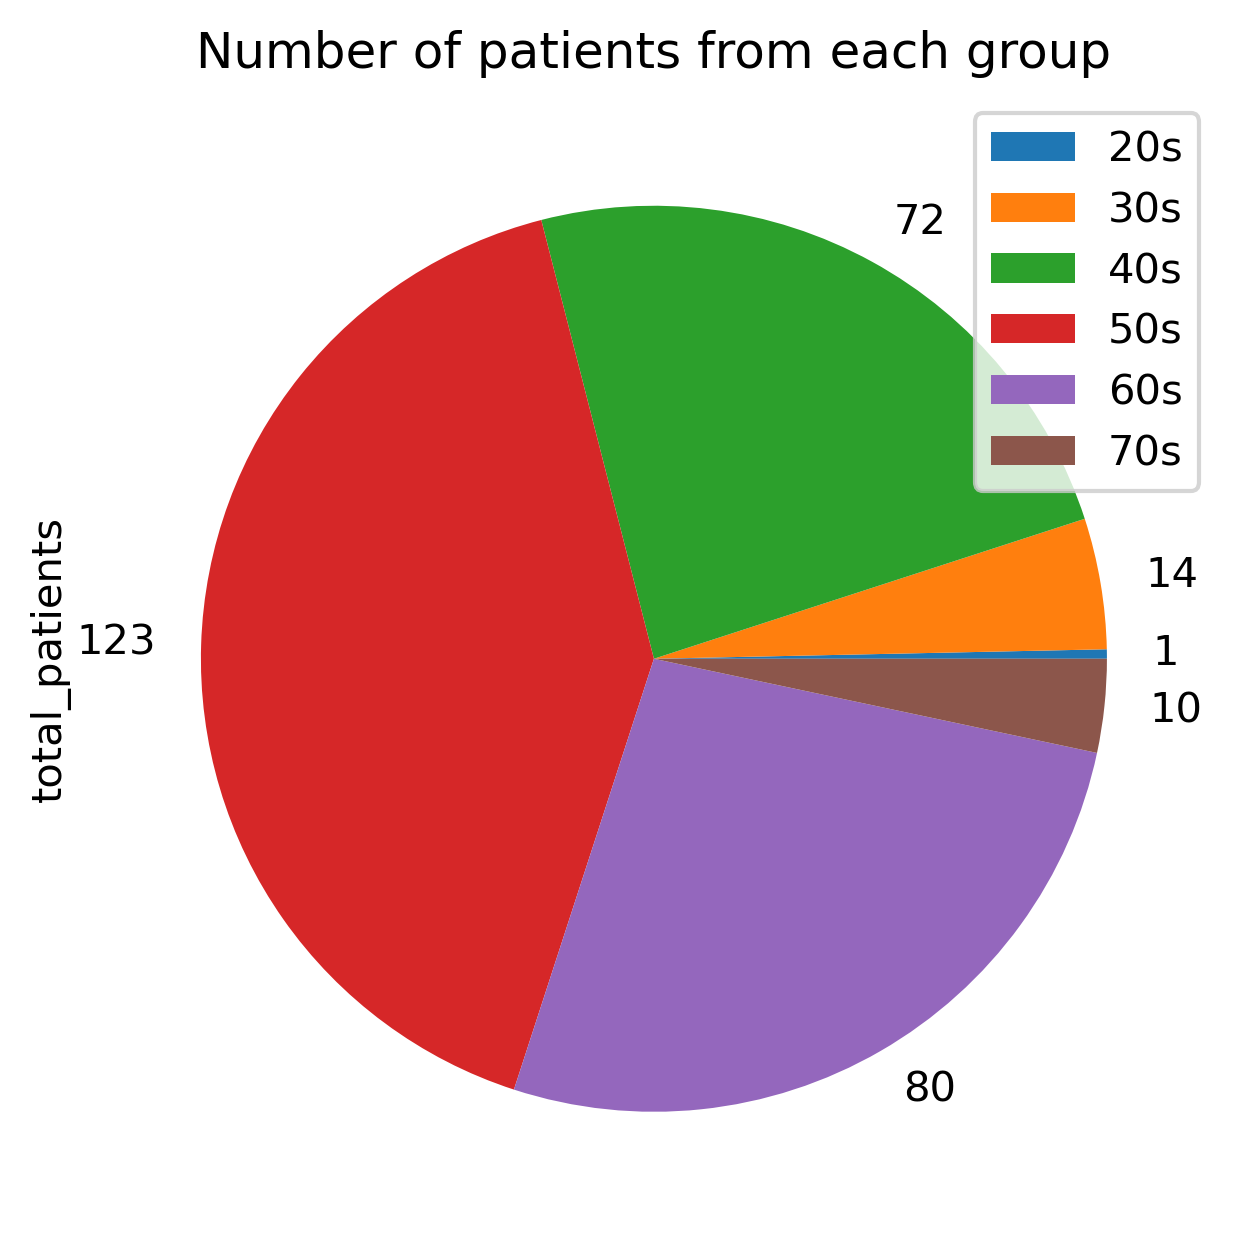

In [17]:
plt.figure(figsize=(7,5), dpi=300)
age_df1.total_patients.plot(kind='pie', labels=age_df1.total_patients)
plt.title('Number of patients from each group')
plt.legend(['20s', '30s', '40s', '50s', '60s', '70s'])

In [18]:
age_df2 = heart_df.groupby(['age_grp','target']).target.count()
# df2 =heart_df.groupby(['age', 'target']).target.count().to_frame(name=None)
# df2
age_df2

age_grp  target
20s      1          1
30s      0          4
         1         10
40s      0         22
         1         50
50s      0         59
         1         64
60s      0         48
         1         32
70s      0          4
         1          6
Name: target, dtype: int64

In [19]:
age_df2 = age_df2.to_frame(name=None)
age_df2

target
age_grp target        
20s     1            1
30s     0            4
        1           10
40s     0           22
        1           50
50s     0           59
        1           64
60s     0           48
        1           32
70s     0            4
        1            6

In [20]:
age_df2.rename(columns= {'target': 'total_target'}, inplace=True)
age_df2

total_target
age_grp target              
20s     1                  1
30s     0                  4
        1                 10
40s     0                 22
        1                 50
50s     0                 59
        1                 64
60s     0                 48
        1                 32
70s     0                  4
        1                  6

In [21]:
high_risk = heart_df.loc[(heart_df.target== 1)]
low_risk = heart_df.loc[(heart_df.target==0)]
# high_risk = high_risk.loc[(high_risk.target==1)]
high_risk

,age,sex,cp,chol,fbs,thal,target,age_grp
5,58,0,0,248,0,2,1,50s
10,71,0,0,149,0,2,1,70s
12,34,0,1,210,0,2,1,30s
16,51,0,2,308,0,2,1,50s
18,50,0,1,244,0,2,1,50s
...,...,...,...,...,...,...,...,...
691,55,0,1,250,0,2,1,50s
708,60,0,2,178,1,2,1,60s
719,52,1,0,233,1,3,1,50s
723,68,0,2,211,0,2,1,60s


Text(0.5, 0.98, 'Higher risk patients')

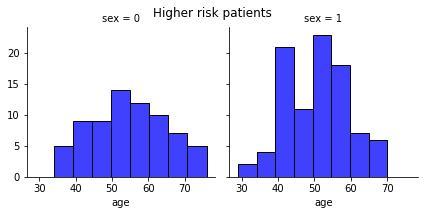

In [22]:
import seaborn as sns

sns.FacetGrid(high_risk, col = 'sex').map(sns.histplot, 
                    'age', color = 'blue')

plt.suptitle('Higher risk patients')

# sns.barplot(x= 'age', y = 'sex', data= high_risk)

In [23]:
high_risk.sex.replace([0,1], ['F', 'M'], inplace=True)
high_risk.rename(columns={'target': 'risk'}, inplace=True)
high_risk

d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,age,sex,cp,chol,fbs,thal,risk,age_grp
5,58,F,0,248,0,2,1,50s
10,71,F,0,149,0,2,1,70s
12,34,F,1,210,0,2,1,30s
16,51,F,2,308,0,2,1,50s
18,50,F,1,244,0,2,1,50s
...,...,...,...,...,...,...,...,...
691,55,F,1,250,0,2,1,50s
708,60,F,2,178,1,2,1,60s
719,52,M,0,233,1,3,1,50s
723,68,F,2,211,0,2,1,60s


In [24]:
sex_df = high_risk.groupby(['sex']).risk.count().to_frame(name=None)
sex_df.reset_index(inplace=True)
sex_df

,sex,risk
0,F,71
1,M,92


In [25]:
print('Table showing number of male patients and female patient with high risk of heart attack')
high_risk.groupby(['sex','age_grp']).risk.count().to_frame(name=None)


Table showing number of male patients and female patient with high risk of heart attack


risk
sex age_grp      
F   30s         5
    40s        18
    50s        23
    60s        20
    70s         5
M   20s         1
    30s         5
    40s        32
    50s        41
    60s        12
    70s         1

In [26]:
DF1=heart_df.groupby(['sex']).sex.count().to_frame(name=None).rename(columns={'sex':'total'})
DF1.reset_index(inplace=True)
DF1.sex.replace([0,1], ['F', 'M'], inplace=True)
DF1

,sex,total
0,F,95
1,M,205


In [27]:
female = sex_df.risk.iloc[0]/DF1.total.iloc[0]*100
male = sex_df.risk.iloc[1]/DF1.total.iloc[1]*100
print('Percentage of women have ridk of heart attack: ',female.round(2))
print('Percentage of men have ridk of heart attack: ',male.round(2))

Percentage of women have ridk of heart attack:  74.74
Percentage of men have ridk of heart attack:  44.88


Text(0.5, 1.0, 'Gender Wise')

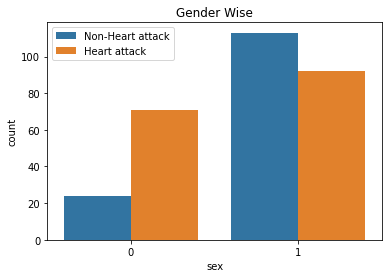

In [28]:
sns.countplot(x='sex', hue='target', data=heart_df)
plt.legend(labels = ['Non-Heart attack', 'Heart attack'])
plt.title('Gender Wise')

In [29]:
cp_type = heart_df.groupby(['cp']).cp.count()
cp_type

cp
0    142
1     50
2     85
3     23
Name: cp, dtype: int64

d:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Types of Chest Pain')

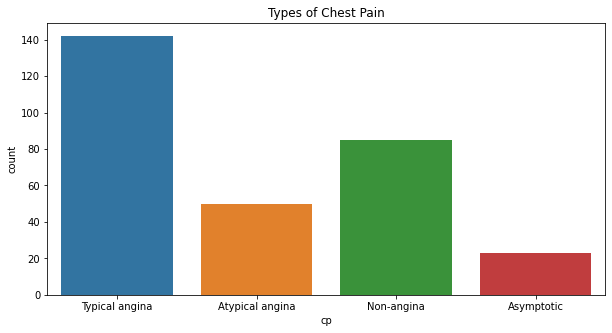

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(heart_df.cp)
plt.xticks([0,1,2,3], ['Typical angina', 'Atypical angina', 'Non-angina', 'Asymptotic'])
plt.title('Types of Chest Pain')

In [31]:
typical_angina = heart_df.loc[heart_df.cp==0]
atypical_angina = heart_df.loc[heart_df.cp==1]
non_angina = heart_df.loc[heart_df.cp==2]
asymptotic = heart_df.loc[heart_df.cp==3]
# typical_angina

In [32]:
typical_cp = typical_angina.groupby(['target']).target.count()
atypical_cp = atypical_angina.groupby(['target']).target.count()
non_angina_cp = non_angina.groupby(['target']).target.count()
asymptotic_cp = asymptotic.groupby(['target']).target.count()
print('typical_cp', typical_cp)
print(" ")
print('atypical_cp', atypical_cp)
print(" ")
print('non_angina_cp', non_angina_cp)
print(" ")
print('asymptotic_cp', asymptotic_cp)

typical_cp target
0    103
1     39
Name: target, dtype: int64
 
atypical_cp target
0     9
1    41
Name: target, dtype: int64
 
non_angina_cp target
0    18
1    67
Name: target, dtype: int64
 
asymptotic_cp target
0     7
1    16
Name: target, dtype: int64


In [33]:
cp0 = typical_cp[1]/cp_type[0]*100
cp1 = atypical_cp[1]/cp_type[0]*100
cp2 = non_angina_cp[1]/cp_type[0]*100
cp3 = asymptotic_cp [1]/cp_type[0]*100
print('Risk of having typical angina is: ', cp0.round())
print('Risk of having atypical angina is: ', cp1.round())
print('Risk of having non angina is: ', cp2.round())
print('Risk of having asymptotic is: ', cp3.round())

Risk of having typical angina is:  27.0
Risk of having atypical angina is:  29.0
Risk of having non angina is:  47.0
Risk of having asymptotic is:  11.0


Text(0.5, 0, 'CHEST PAIN')

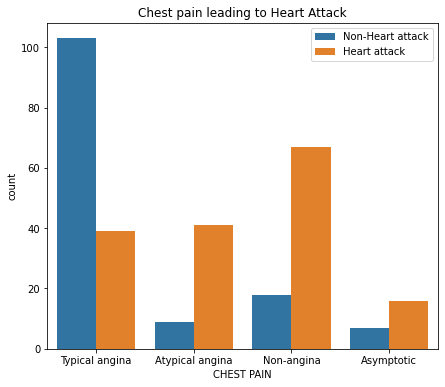

In [34]:
plt.figure(figsize=(7,6))
sns.countplot(x='cp', hue='target', data= heart_df)
plt.legend(labels=['Non-Heart attack', 'Heart attack'])
plt.xticks([0,1,2,3], ['Typical angina', 'Atypical angina', 'Non-angina', 'Asymptotic'])
plt.title('Chest pain leading to Heart Attack')
plt.xlabel('CHEST PAIN')

Text(0.5, 0, 'Fasting blood sugar level mg/dL')

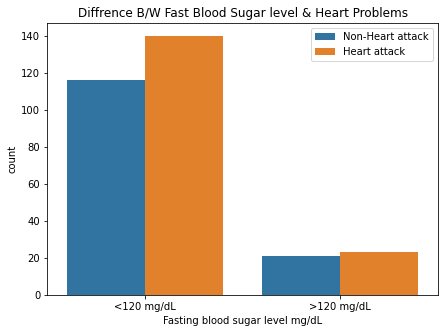

In [35]:
plt.figure(figsize=(7,5))
sns.countplot(x='fbs', hue='target', data= heart_df)
plt.legend(labels=['Non-Heart attack', 'Heart attack'])
plt.xticks([0,1], ['<120 mg/dL', '>120 mg/dL'])
plt.title('Diffrence B/W Fast Blood Sugar level & Heart Problems')
plt.xlabel('Fasting blood sugar level mg/dL')

Text(0.5, 6.79999999999999, 'Fasting blood sugar level mg/dL')

<Figure size 504x360 with 0 Axes>

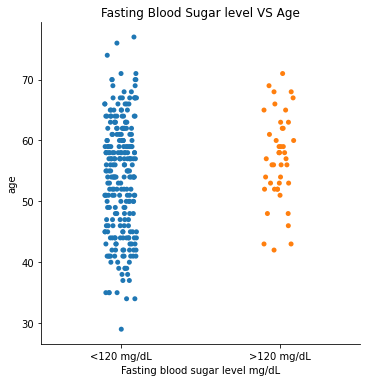

In [36]:
plt.figure(figsize=(7,5))
sns.catplot(x='fbs', y= 'age', data= heart_df)
plt.xticks([0,1], ['<120 mg/dL', '>120 mg/dL'])
plt.title('Fasting Blood Sugar level VS Age')
plt.xlabel('Fasting blood sugar level mg/dL')

Text(0.5, 6.79999999999999, 'Fasting blood sugar level mg/dL')

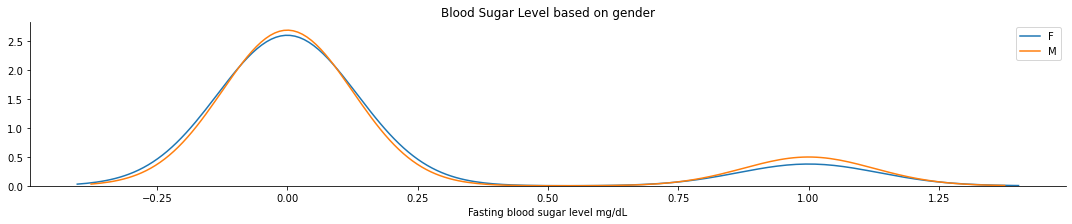

In [37]:
sns.FacetGrid(heart_df, hue='sex', aspect=5).map(sns.kdeplot,'fbs')
plt.legend(labels=['F', 'M'])
plt.title('Blood Sugar Level based on gender')
plt.xlabel('Fasting blood sugar level mg/dL')

In [38]:
thal_type = heart_df.groupby(['thal']).thal.count()
thal_type

thal
1     18
2    165
3    117
Name: thal, dtype: int64

Text(0.5, 0, 'Thalassemia')

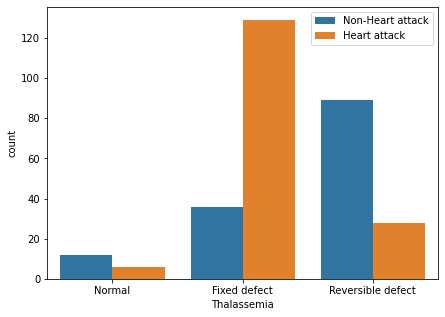

In [39]:
plt.figure(figsize= (7,5))
sns.countplot(x= 'thal', hue = 'target', data= heart_df)
plt.legend(labels=['Non-Heart attack', 'Heart attack'])
plt.xticks([0,1,2], ['Normal', 'Fixed defect', 'Reversible defect'])
plt.xlabel('Thalassemia')

Text(0.5, 1.0, 'Heart problems with respect to Thalassemia')

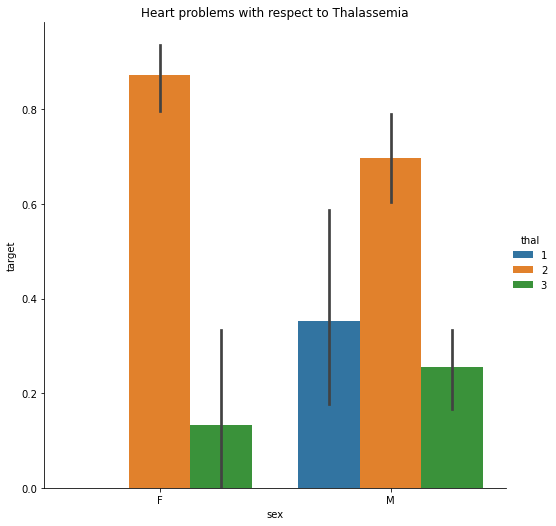

In [40]:
sns.catplot(x= 'sex', y='target', hue= 'thal', kind='bar', data = heart_df, height=7)
plt.xticks([0,1], ['F', 'M'])
plt.title('Heart problems with respect to Thalassemia')

Text(0.5, 1.0, 'Age VS Cholesterol level')

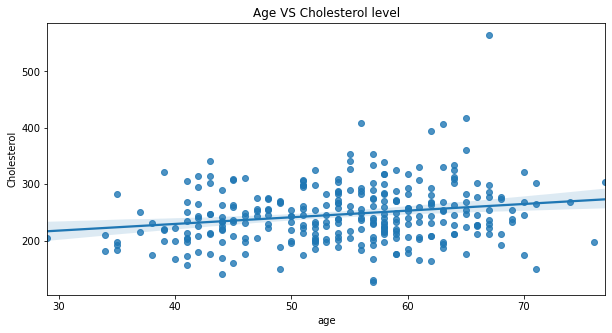

In [41]:
plt.figure(figsize=(10,5))
sns.regplot(x='age', y= 'chol', data= heart_df)
plt.ylabel('Cholesterol')
plt.title('Age VS Cholesterol level')

Text(0.5, 1.0, 'Gender wise cholestorel level')

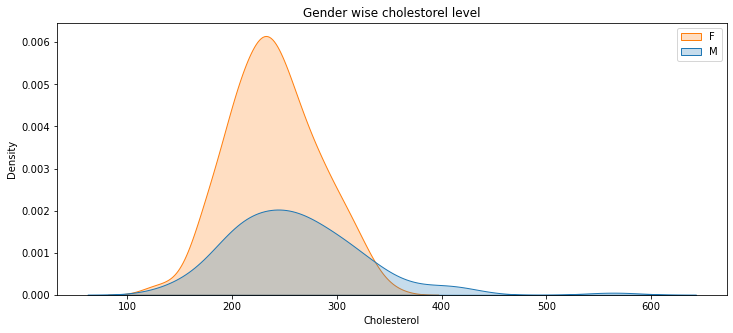

In [42]:
plt.figure(figsize=(12,5))
sns.kdeplot(x='chol', data= heart_df, hue='sex', shade=True)
plt.xlabel('Cholesterol')
plt.legend(labels=['F', 'M'])
plt.title('Gender wise cholestorel level')

In [43]:
def chol_level(row):
    if row.chol>=200 and row.chol<=239:
        return 'boder line'
    elif row.chol>= 240:
        return 'excess'
    elif row.chol<= 200and row.chol>=170:
        return 'normal'
    else:
        return 'less'
    
heart_df['chol_level'] = heart_df.apply(chol_level, axis=1)
heart_df.head(10)

,age,sex,cp,chol,fbs,thal,target,age_grp,chol_level
0,52,1,0,212,0,3,0,50s,boder line
1,53,1,0,203,1,3,0,50s,boder line
2,70,1,0,174,0,3,0,70s,normal
3,61,1,0,203,0,3,0,60s,boder line
4,62,0,0,294,1,2,0,60s,excess
5,58,0,0,248,0,2,1,50s,excess
6,58,1,0,318,0,1,0,50s,excess
7,55,1,0,289,0,3,0,50s,excess
8,46,1,0,249,0,3,0,40s,excess
9,54,1,0,286,0,2,0,50s,excess


In [44]:
heart_df.groupby(['chol_level','target']).chol.count()

chol_level  target
boder line  0         38
            1         58
excess      0         79
            1         76
less        0          6
            1          6
normal      0         14
            1         23
Name: chol, dtype: int64